In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('dataset.csv')
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [3]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [4]:
df = df.drop('Unnamed: 0', axis='columns')
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [5]:
df.isnull().values.any()

True

In [6]:
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().values.any()

False

In [9]:
df.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [10]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [11]:
df.track_genre.unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [12]:
df.track_genre.value_counts()

acoustic             1000
afrobeat             1000
psych-rock           1000
progressive-house    1000
power-pop            1000
                     ... 
emo                  1000
electronic           1000
electro              1000
world-music          1000
k-pop                 999
Name: track_genre, Length: 114, dtype: int64

In [13]:
df['artists'].nunique()

31437

In [14]:
df.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [15]:
unique_songs = df['track_name'].unique().shape[0]
unique_songs

73608

In [16]:
#Look at most popular songs 
pop_songs = df.groupby('track_name')['popularity'].count().reset_index().sort_values(['popularity', 'track_name'], ascending = [0,1])
pop_songs['percentage']  = round(pop_songs['popularity'].div(pop_songs['popularity'].sum())*100, 2)

In [17]:
ten_pop_songs = pop_songs[:10]
ten_pop_songs

,track_name,popularity,percentage
49965,Run Rudolph Run,151,0.13
24111,Halloween,88,0.08
21601,Frosty The Snowman,81,0.07
34132,Little Saint Nick - 1991 Remix,76,0.07
32863,Last Last,75,0.07
10984,Christmas Time,72,0.06
13045,CÓMO SE SIENTE - Remix,64,0.06
53393,Sleigh Ride,61,0.05
47830,RUMBATÓN,60,0.05
67092,X ÚLTIMA VEZ,58,0.05


In [18]:
labels = ten_pop_songs['track_name'].tolist()
counts = ten_pop_songs['popularity'].tolist()

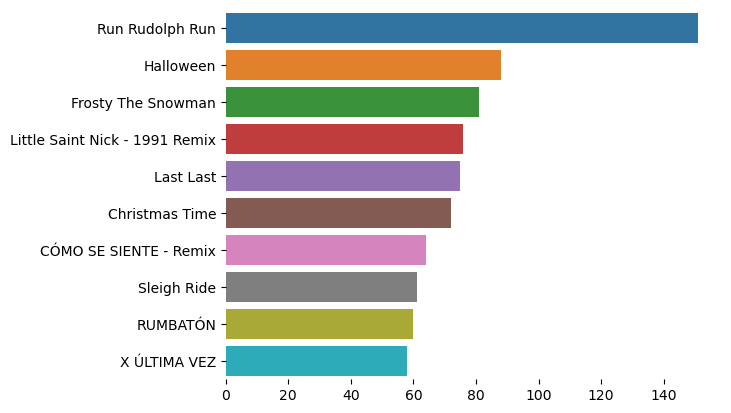

In [19]:
plt.figure()
sns.barplot(x=counts, y=labels)
sns.despine(left=True, bottom=True)

In [20]:
#Look at most popular artists 
pop_artists = df.groupby('artists')['popularity'].count().reset_index().sort_values(['popularity', 'artists'], ascending = [0,1])
pop_artists['percentage']  = round(pop_artists['popularity'].div(pop_artists['popularity'].sum())*100, 2)

In [21]:
ten_pop_artists = pop_artists[:10]
ten_pop_artists

,artists,popularity,percentage
26983,The Beatles,279,0.24
10418,George Jones,271,0.24
26009,Stevie Wonder,236,0.21
16049,Linkin Park,224,0.20
8587,Ella Fitzgerald,222,0.19
21810,Prateek Kuhad,217,0.19
9306,Feid,202,0.18
5417,Chuck Berry,190,0.17
12000,Håkan Hellström,183,0.16
20555,OneRepublic,181,0.16


In [22]:
labels = ten_pop_artists['artists'].tolist()
counts = ten_pop_artists['popularity'].tolist()

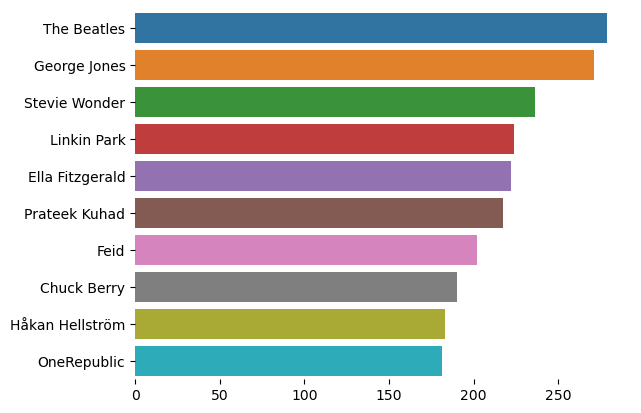

In [23]:
plt.figure()
sns.barplot(x=counts, y=labels)
sns.despine(left=True, bottom=True)

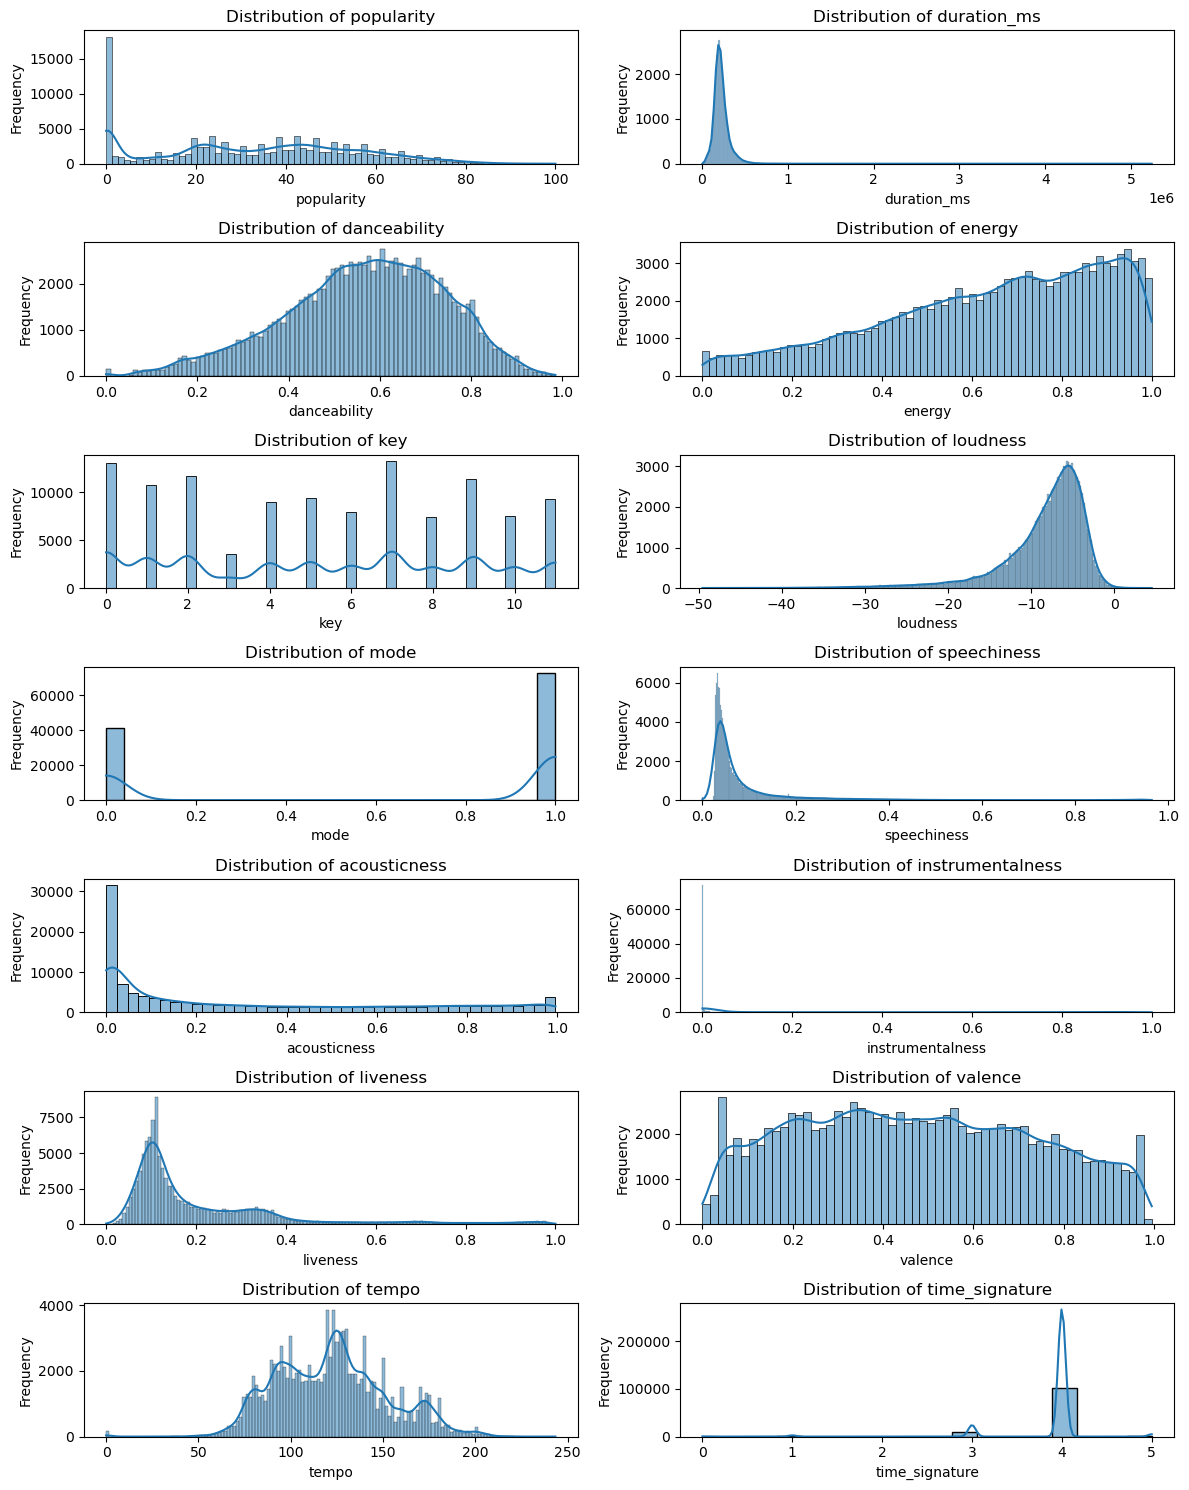

In [24]:
# Select numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the number of rows and columns needed for subplots
num_plots = len(numerical_columns.columns)
num_rows = (num_plots + 1) // 2  # Add 1 to ensure even number of rows
num_cols = 2

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 15))
fig.subplots_adjust(hspace=0.5)

# Plot histograms for each numerical column
for i, column in enumerate(numerical_columns.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx] if num_plots > 1 else axes
    sns.histplot(data=numerical_columns, x=column, kde=True, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Remove any empty subplots
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [25]:
mood_categories = {
    'acoustic': ['acoustic', 'folk', 'singer-songwriter'],
    'upbeat': ['afrobeat', 'chicago-house', 'disco', 'edm', 'electro', 'electronic', 'party', 'pop-film', 'pop', 'power-pop'],
    'rock': ['alt-rock', 'grunge', 'hard-rock', 'punk-rock', 'rock-n-roll', 'rock'],
    'alternative': ['alternative', 'indie', 'indie-pop', 'emo', 'punk', 'ska'],
    'ambient': ['ambient', 'chill', 'new-age'],
    'melancholic': ['blues', 'sad'],
    'energetic': ['brazil', 'dance', 'dancehall', 'dubstep', 'hip-hop', 'house', 'reggae', 'reggaeton', 'techno', 'trance'],
    'instrumental': ['classical', 'instrumentalness', 'jazz', 'opera'],
    'mellow': ['country', 'latin', 'romance', 'salsa', 'samba', 'tango'],
    'miscellaneous': ['anime', 'black-metal', 'bluegrass', 'british', 'cantopop', 'children', 'comedy', 'disney', 'drum-and-bass',
                      'dub', 'french', 'funk', 'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove', 'guitar', 'happy',
                      'hardcore', 'hardstyle', 'heavy-metal', 'honky-tonk', 'idm', 'indian', 'iranian', 'j-dance', 'j-idol', 
                      'j-pop', 'j-rock', 'k-pop', 'kids', 'latino', 'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno',
                      'mpb', 'pagode', 'piano', 'progressive-house', 'psych-rock', 'r-n-b', 'rockabilly', 'sertanejo', 
                      'show-tunes', 'soul', 'spanish', 'study', 'swedish', 'synth-pop', 'trip-hop', 'turkish', 'world-music',
                      'breakbeat', 'club', 'death-metal', 'deep-house', 'detroit-techno', 'forro', 'industrial', 'sleep', 'songwriter']
}

# Reverse the mappings to create a genre to category mapping
genre_to_category = {genre: category for category, genres in mood_categories.items() for genre in genres}

# Map genres to categories and create a new column in the dataframe
df['genre_mood'] = df['track_genre'].map(genre_to_category)

# Replace missing values with 'other'
df['genre_mood'].fillna('other', inplace=True)

C:\Users\777ha\AppData\Local\Temp\ipykernel_27684\1623623105.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre_mood'] = df['track_genre'].map(genre_to_category)
C:\Users\777ha\AppData\Local\Temp\ipykernel_27684\1623623105.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre_mood'].fillna('other', inplace=True)


In [26]:
# Check unique values in the 'track_genre' column
unique_genres = df['track_genre'].unique()
print(unique_genres)

# Check if all genres are covered by the mapping
for genre in unique_genres:
    if genre not in genre_to_category:
        print(f"Genre '{genre}' not found in the mapping.")

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' 'show

In [27]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,genre_mood
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,acoustic


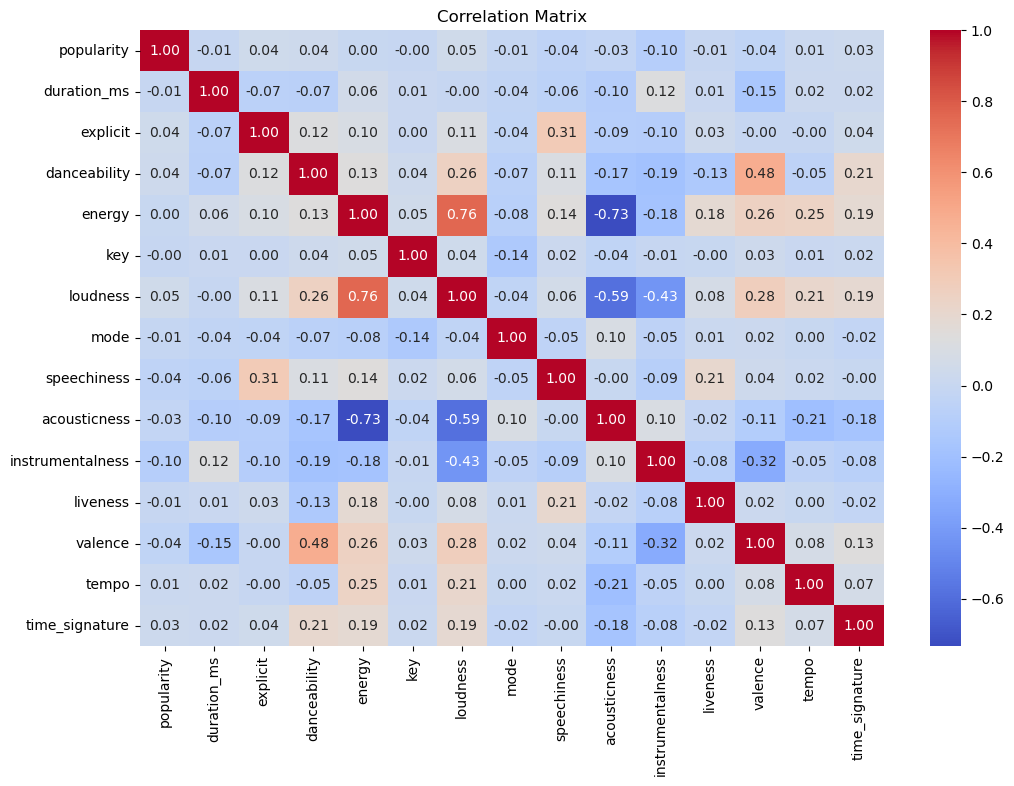

In [28]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [32]:
from sklearn.neighbors import NearestNeighbors

def recommend_similar_songs_knn(genre_mood, target_track_name, df, n_neighbors=5):
    # Filter the DataFrame for the specified genre_mood
    mood_filtered_df = df[df['genre_mood'] == genre_mood].copy()
    
    # Find the features of the target song
    target_song_features = df[df['track_name'] == target_track_name][['danceability', 'valence', 'energy', 'loudness', 'tempo']]
    
    # If the target song is not found, return an empty DataFrame
    if target_song_features.empty:
        print(f"Target song '{target_track_name}' not found in the dataset.")
        return pd.DataFrame()
    
    # Fit a KNN model on the mood filtered DataFrame
    X = mood_filtered_df[['danceability', 'valence', 'energy', 'loudness', 'tempo']]
    knn_model = NearestNeighbors(n_neighbors=n_neighbors, algorithm='auto')
    knn_model.fit(X)
    
    # Find the indices of the nearest neighbors to the target song
    distances, indices = knn_model.kneighbors(target_song_features)
    
    # Get the indices of similar songs
    similar_song_indices = indices.flatten()
    
    # Retrieve the similar songs from the DataFrame
    similar_songs = mood_filtered_df.iloc[similar_song_indices][['track_name', 'genre_mood']].drop_duplicates()
    
    return similar_songs

# Example usage:
target_track_name = "Can't Help Falling In Love"  # target song
genre_mood = "acoustic"  # desired genre_mood
similar_songs = recommend_similar_songs_knn(genre_mood, target_track_name, df)

# Print recommended similar songs
print(similar_songs)

                                        track_name genre_mood
3                       Can't Help Falling In Love   acoustic
353                                           太陽さん   acoustic
99754                                  Watercolour   acoustic
926                            Untainted Innocence   acoustic
855                                  Teenage Dream   acoustic
407                                     July Bones   acoustic
85                                      Guaranteed   acoustic
536                  Everytime We Touch (Acoustic)   acoustic
99388                                      Snowman   acoustic
34873                                    Gandagana   acoustic
99172                             Ranjha - Reprise   acoustic
99219                           Cherry Wine - Live   acoustic
428                                     Wilderness   acoustic
99916                                     Delicate   acoustic
34642                               La Trastrasera   acoustic
953     